<a href="https://colab.research.google.com/github/6306863958/Afame-Technologies/blob/main/LeNet_on_MNIST_DATA_SET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
model=Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))










11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                         

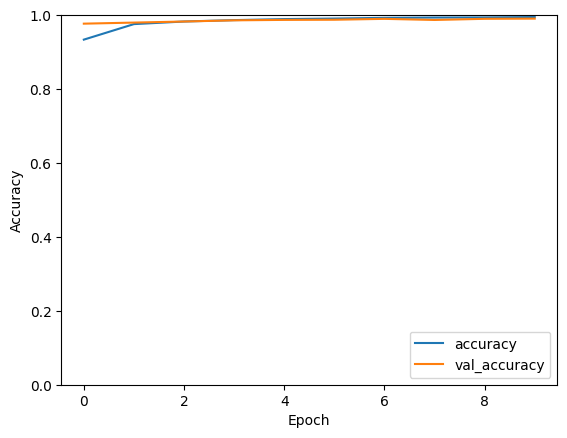

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Ensure reproducibility
tf.random.set_seed(42)

# Step 1: Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to the range of [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Expand dimensions to add the channel dimension (since MNIST images are grayscale)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Step 2: Define the LeNet model
def create_lenet_model():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

model = create_lenet_model()
model.summary()

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Step 6: Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
